In [1]:
!pip install selenium
!apt-get update
!apt-get install chromium-browser chromium-chromedriver

exit()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.9 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Ign:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,071 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,425 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,601 kB]
Hit:9 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [12

In [1]:
import json
import time
import requests
import numpy as np
import pandas as pd

from PIL import Image
from io import BytesIO
from types import NoneType
from bs4 import BeautifulSoup
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

In [2]:
def web_driver():
    capabilities = DesiredCapabilities.CHROME
    # capabilities["loggingPrefs"] = {"performance": "ALL"}  # chromedriver < ~75
    capabilities["goog:loggingPrefs"] = {"performance": "ALL"}  # chromedriver 75+

    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument('--start-maximized')  # Adds maximized window functionality in headless mode
    driver = webdriver.Chrome(options=options,
                            #   desired_capabilities=capabilities
                              )
    return driver

def close_driver(driver):
    try:
        driver.quit()  # Cierra todas las ventanas y finaliza el WebDriver
        print("Driver closed successfully.")
    except Exception as e:
        print(f"An error occurred while closing the driver: {e}")

In [15]:
def click_username_field(driver):
    """
    Clicks on the username input field.

    Parameters:
    - driver: The Selenium WebDriver instance.
    """
    try:
        # Locate and click on the input field by its ID
        username_field = driver.find_element(By.ID, "username")
        username_field.click()
    except Exception as e:
        print(f"An error occurred while clicking the field: {e}")

def enter_username_text(driver, username="jeapapan"):
    """
    Enters a given username into the username input field without submitting.

    Parameters:
    - driver: The Selenium WebDriver instance.
    - username (str): The username to be entered. Default is "jeapapan".
    """
    try:
        # Locate the input field by its ID and type in the username
        username_field = driver.find_element(By.ID, "username")
        username_field.clear()  # Clear any existing text if needed
        username_field.send_keys(username)
    except Exception as e:
        print(f"An error occurred while entering text: {e}")

def click_password_field(driver):
    """
    Clicks on the password input field.

    Parameters:
    - driver: The Selenium WebDriver instance.
    """
    try:
        # Locate and click on the password field by its ID
        password_field = driver.find_element(By.ID, "password")
        password_field.click()
    except Exception as e:
        print(f"An error occurred while clicking the password field: {e}")

def enter_password_text(driver, password=" gt5hy6JU7.5"):
    """
    Enters a given password into the password input field without submitting.

    Parameters:
    - driver: The Selenium WebDriver instance.
    - password (str): The password to be entered. Default is "your_password".
    """
    try:
        # Locate the password field by its ID and type in the password
        password_field = driver.find_element(By.ID, "password")
        password_field.clear()  # Clear any existing text if needed
        password_field.send_keys(password)
    except Exception as e:
        print(f"An error occurred while entering the password: {e}")

def click_remember_me_checkbox(driver):
    """
    Clicks on the 'Recordarme' checkbox.

    Parameters:
    - driver: The Selenium WebDriver instance.
    """
    try:
        # Locate and click on the checkbox by its ID
        remember_me_checkbox = driver.find_element(By.ID, "warn")
        remember_me_checkbox.click()
    except Exception as e:
        print(f"An error occurred while clicking the 'Recordarme' checkbox: {e}")

def click_login_button(driver):
    """
    Clicks on the 'LOGIN' button.

    Parameters:
    - driver: The Selenium WebDriver instance.
    """
    try:
        # Locate and click on the submit button by its class name (or other suitable identifier)
        login_button = driver.find_element(By.CLASS_NAME, "btn-submit")
        login_button.click()
    except Exception as e:
        print(f"An error occurred while clicking the 'LOGIN' button: {e}")

def click_calendar_link(driver):
    """
    Clicks on the 'Calendario' link.

    Parameters:
    - driver: The Selenium WebDriver instance.
    """
    try:
        # Locate and click on the link by its ID
        calendar_link = driver.find_element(By.ID, "global_nav_calendar_link")
        calendar_link.click()
    except Exception as e:
        print(f"An error occurred while clicking the 'Calendario' link: {e}")

def click_agenda_button(driver):
    """
    Clicks on the 'Agenda' button.

    Parameters:
    - driver: The Selenium WebDriver instance.
    """
    try:
        # Locate and click on the button by its ID
        agenda_button = driver.find_element(By.ID, "agenda")
        agenda_button.click()
    except Exception as e:
        print(f"An error occurred while clicking the 'Agenda' button: {e}")

def extract_assignments(driver):
    """
    Extracts assignments with 'Fecha de entrega' information from the calendar agenda.

    Parameters:
    - driver: The Selenium WebDriver instance.

    Returns:
    - A list of dictionaries containing the 'date_time' and 'title' for each assignment.
    """
    assignments = []

    try:
        # Locate the agenda event container elements
        event_items = driver.find_elements(By.CSS_SELECTOR, ".agenda-event__item")

        for event in event_items:
            # Extract date and time (Fecha de entrega)
            date_time_elements = event.find_elements(By.CLASS_NAME, "agenda-event__time")
            date_time = date_time_elements[0].text if date_time_elements else "No date-time"

            # Extract title
            title_elements = event.find_elements(By.CLASS_NAME, "agenda-event__title")
            title = title_elements[0].text if title_elements else "No title"

            # Store the assignment details in a dictionary
            assignments.append({"date_time": date_time, "title": title})

    except Exception as e:
        print(f"An error occurred while extracting assignments: {e}")

    return

import requests

def send_image_to_telegram_channel(bot_token, channel_id, image_path, caption=None):
    """
    Sends an image to a Telegram channel using a bot token.

    :param bot_token: The token for the Telegram bot.
    :param channel_id: The channel ID or username with '@' symbol.
    :param image_path: The path of the image to be sent.
    :param caption: (Optional) Caption text for the image.
    """
    url = f"https://api.telegram.org/bot{bot_token}/sendPhoto"

    try:
        with open(image_path, "rb") as image_file:
            response = requests.post(
                url,
                data={
                    "chat_id": channel_id,
                    "caption": caption
                },
                files={
                    "photo": image_file
                }
            )

        if response.status_code == 200:
            print("Image sent successfully!")
        else:
            print(f"Failed to send image. Error: {response.text}")

    except FileNotFoundError:
        print(f"Error: The image at '{image_path}' was not found.")

def extract_assignments_with_dates(driver):
    """
    Extracts assignment titles with their corresponding due dates and times from the calendar agenda.

    Parameters:
    - driver: The Selenium WebDriver instance.

    Returns:
    - A list of dictionaries containing the 'date', 'time', and 'title' for each assignment.
    """
    assignments = []

    try:
        # Locate all date headers (for each day)
        date_elements = driver.find_elements(By.CSS_SELECTOR, ".agenda-day h3 .screenreader-only")

        # Iterate over each date
        for date_element in date_elements:
            current_date = date_element.text.strip()

            # Get the container for all events under the current date
            event_items = date_element.find_element(By.XPATH, "../../following-sibling::div[1]//ul[@class='agenda-event__list']").find_elements(By.CLASS_NAME, "agenda-event__item")

            for event in event_items:
                # Extract due time
                time_elements = event.find_elements(By.CLASS_NAME, "agenda-event__time")
                due_time = time_elements[0].text if time_elements else "No time"

                # Extract title
                title_elements = event.find_elements(By.CLASS_NAME, "agenda-event__title")
                title = title_elements[0].text if title_elements else "No title"

                # Store the assignment details in a dictionary
                assignments.append({
                    "date": current_date,
                    "time": due_time,
                    "title": title
                })

    except Exception as e:
        print(f"An error occurred while extracting assignments: {e}")

    return assignments

def send_message_to_telegram_channel(bot_token, channel_id, message_text):
    """
    Sends a text message to a Telegram channel using a bot token.

    :param bot_token: The token for the Telegram bot.
    :param channel_id: The channel ID or username with '@' symbol.
    :param message_text: The text message to be sent.
    """
    url = f"https://api.telegram.org/bot{bot_token}/sendMessage"

    try:
        response = requests.post(
            url,
            data={
                "chat_id": channel_id,
                "text": message_text
            }
        )

        if response.status_code == 200:
            print("Message sent successfully!")
        else:
            print(f"Failed to send message. Error: {response.text}")

    except Exception as e:
        print(f"An error occurred: {e}")

In [4]:
# close_driver(driver)

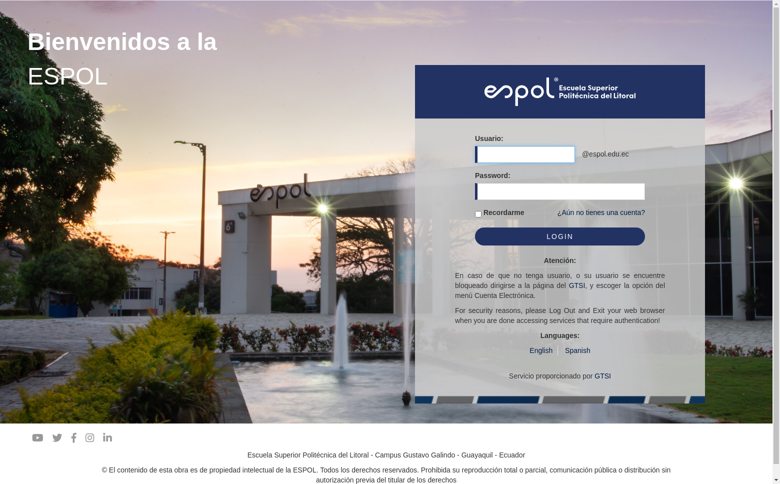

In [6]:
driver = web_driver()

url = 'https://aulavirtual.espol.edu.ec/login/cas'

driver.get(url)

time.sleep(3)

png = driver.get_screenshot_as_png() # saves screenshot of entire page
im0 = Image.open(BytesIO(png))
im = im0.resize((im0.width // 2, im0.height // 2))
im#.save("")

In [7]:
click_username_field(driver)
enter_username_text(driver)

click_password_field(driver)
enter_password_text(driver)

click_remember_me_checkbox(driver)
click_login_button(driver)

In [8]:
time.sleep(5)
click_calendar_link(driver)
time.sleep(3)
click_agenda_button(driver)
time.sleep(4)

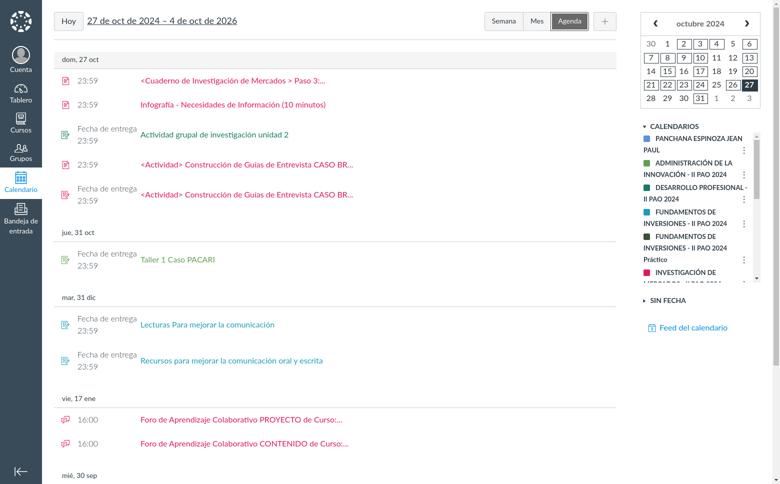

In [12]:
png = driver.get_screenshot_as_png() # saves screenshot of entire page

im0 = Image.open(BytesIO(png))
im = im0.resize((im0.width // 2, im0.height // 2))
im_name = "aula_virtual_calendar.png"
im.save(im_name)
im

In [ ]:
L = extract_assignments_with_dates(driver)

data = [i for i in L if "Fecha" in i['time']]
msg = ''

for i in data:
    date = i['date']
    time = i['time'].split(" ")
    title = i['title']

    time2 = f"Fecha de entrega: {date} {time[-1]}\n{title}\n\n"
    msg+=time2
    # print(time2)
    # print()

msg = msg[:-2]

In [51]:
# Replace with your actual bot token, channel ID, and image path
bot_token = "7939854766:AAG1BKi_7jy5zTMvEwGsSQ9iDnbxHPDbk5U"
channel_id = "-1002322523843"
image_path = str(im_name)
caption = str(msg)

send_image_to_telegram_channel(bot_token, channel_id, image_path, caption)

Image sent successfully!


In [13]:
# Replace with your actual bot token, channel ID, and image path
bot_token = "7939854766:AAG1BKi_7jy5zTMvEwGsSQ9iDnbxHPDbk5U"
channel_id = "-1002322523843"
image_path = str(im_name)
caption = "This is an optional caption for the image."

send_image_to_telegram_channel(bot_token, channel_id, image_path, caption)

Image sent successfully!


In [50]:
# Replace with your actual bot token, channel ID, and message text
bot_token = "7939854766:AAG1BKi_7jy5zTMvEwGsSQ9iDnbxHPDbk5U"
channel_id = "-1002322523843"
message_text = str(msg)

send_message_to_telegram_channel(bot_token, channel_id, message_text)

Message sent successfully!
